# Craft a Story From a Dataset Exercise

#### Data Source: 
https://archive.ics.uci.edu/ml/datasets/clickstream+data+for+online+shopping
#### Citation: 
ÅapczyÅ„ski M., BiaÅ‚owÄ…s S. (2013) Discovering Patterns of Users' Behaviour in an E-shop - Comparison of Consumer Buying Behaviours in Poland and Other European Countries, â€œStudia Ekonomiczneâ€, nr 151, â€œLa sociÃ©tÃ© de l'information : perspective europÃ©enne et globale : les usages et les risques d'Internet pour les citoyens et les consommateursâ€, p. 144-153

* For the exercise, I would present an 'executive' level presentation by using the figures + accompanying notes toward the bottom of the workbook

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
#read clothing data
data = pd.read_csv('clothing.csv', sep=';')

In [3]:
#check data
data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [4]:
#check null values
data.isnull().sum()

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

In [5]:
#check duplicates
data.duplicated().sum()

0

In [6]:
#check data types
data.dtypes

year                        int64
month                       int64
day                         int64
order                       int64
country                     int64
session ID                  int64
page 1 (main category)      int64
page 2 (clothing model)    object
colour                      int64
location                    int64
model photography           int64
price                       int64
price 2                     int64
page                        int64
dtype: object

In [7]:
#create date column
data['date'] = pd.to_datetime(data[['year','month','day']])

In [8]:
#create weekday column
data['dayofweek'] = data['date'].dt.day_name()

### Clicks by Date

In [9]:
#group by date
grouped_by_date = data.groupby('date', as_index=True)['price'].agg(['count','sum','mean'])
#drop last date (incomplete)
grouped_by_date = grouped_by_date.sort_index()[:-1]
#convert to ordinal
grouped_by_date.index = grouped_by_date.index.map(pd.Timestamp.toordinal)

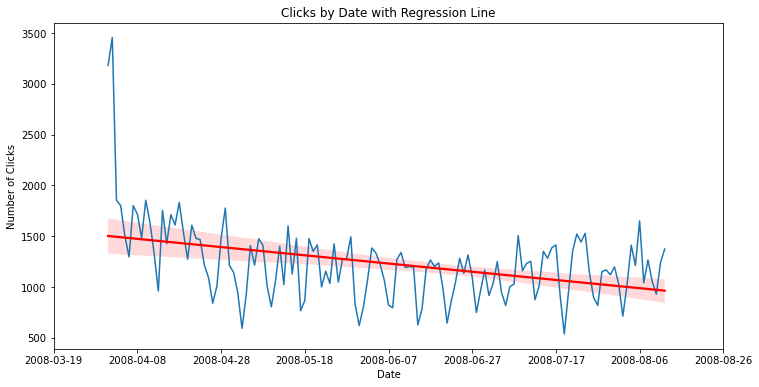

In [10]:
#plot number of clicks by date
ax1 = grouped_by_date.plot(y='count', figsize=(12, 6), legend=False,
              title='Clicks by Date with Regression Line')
#add regression line
sns.regplot(data=grouped_by_date, x=grouped_by_date.index, y='count', ax=ax1, color='red', label='Linear Model', scatter=False)
xticks = ax1.get_xticks()
labels = [pd.Timestamp.fromordinal(int(label)).date() for label in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.show()

* Launch of the ecommerce site had the highest number of clicks
* Downward trend of click activity over time

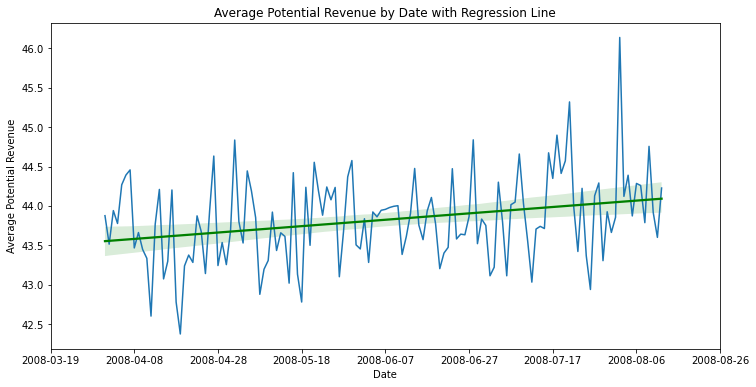

In [11]:
#plot average price by date
ax1 = grouped_by_date.plot(y='mean', figsize=(12, 6), legend=False,
              title='Average Potential Revenue by Date with Regression Line')
#add regression line
sns.regplot(data=grouped_by_date, x=grouped_by_date.index, y='mean', ax=ax1, color='green', label='Linear Model', scatter=False)
xticks = ax1.get_xticks()
labels = [pd.Timestamp.fromordinal(int(label)).date() for label in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
plt.xlabel('Date')
plt.ylabel('Average Potential Revenue')
plt.show()

* Despite downward trend of click activity sitewise, slight upward trend of average price of clicked products
* Increase of potential revenue over time, contingent on conversion rate

In [12]:
#group clicks by month
grouped_by_month = data.groupby('month', as_index=False).agg({'price': ['count','sum', 'mean']})
#drop last month (incomplete)
grouped_by_month = grouped_by_month.sort_values('month')[:-1]
grouped_by_month.columns = ['_'.join(col).strip() for col in grouped_by_month.columns.values]

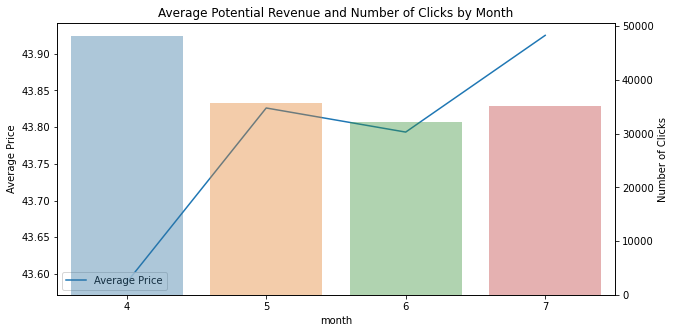

In [13]:
#plot average price by month
fig, ax1 = plt.subplots(figsize=(10,5))
sns.lineplot(data = grouped_by_month['price_mean'], ax=ax1, label='Average Price')
ax1.set(xlabel='month', ylabel='Average Price', title='Average Potential Revenue and Number of Clicks by Month')
ax1.legend(loc='lower left')
#plot number of clicks
ax2 = ax1.twinx()
sns.barplot(data = grouped_by_month, x='month_', y='price_count', alpha=0.4, ax=ax2)
ax2.set(ylabel='Number of Clicks')
plt.show()

* Increase of average price/potential revenue aggregated by month
* Overlaid over general decrease of total number of clicks 

In [14]:
#group by day of week
grouped_by_dayofweek = data.groupby('dayofweek', as_index=False).agg({'price': ['count','sum', 'mean']})
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
grouped_by_dayofweek.columns = ['_'.join(col).strip() for col in grouped_by_dayofweek.columns.values]

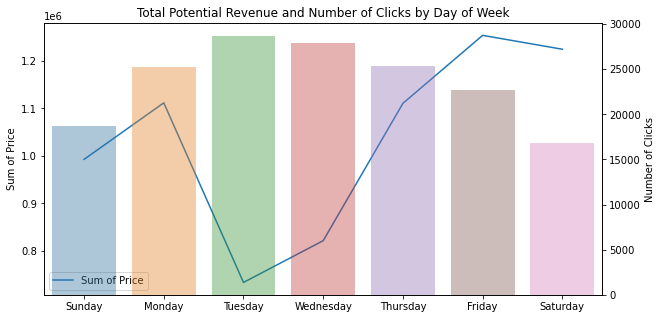

In [15]:
#plot sum of price by day of week
fig, ax1 = plt.subplots(figsize=(10,5))
sns.lineplot(data = grouped_by_dayofweek['price_sum'], ax=ax1, label='Sum of Price')
ax1.set(ylabel='Sum of Price', title='Total Potential Revenue and Number of Clicks by Day of Week')
ax1.legend(loc='lower left')
ax2 = ax1.twinx()
#plot number of clicks
sns.barplot(x='dayofweek_', y='price_count',data=grouped_by_dayofweek, order=order, ax=ax2, alpha=0.4)
ax2.set(ylabel='Number of Clicks')
plt.show()

* Number of clicks aggregated by day of week
* Increase click activity mid-week, peaking on Tuesday
* Sum of price overlaid as a line
* Highest potential revenue toward the weekend, peaking on Friday

### Clicks by Country

In [16]:
#read countries txt file
countries = pd.read_csv('countries.txt', sep='-', names=['number','country'])
#create countries dictionary
countries_dict = pd.Series(countries.country.values,index=countries.number).to_dict()
#add new country_name column
data['country_name'] = data.country.map(countries_dict)

In [17]:
#sort clicks by country
countries_value_counts = data.country_name.value_counts()
print(countries_value_counts)

Poland                    133963
Czech Republic             18003
Lithuania                   4091
net (*.net)                 2522
com (*.com)                 1385
Germany                      834
Ireland                      811
Slovakia                     716
United Kingdom               684
Belgium                      256
Netherlands                  227
unidentified                 210
USA                          170
Sweden                       163
Denmark                      152
Romania                      144
Italy                        144
Norway                       139
Switzerland                  137
France                       125
Estonia                      115
Luxembourg                    71
Austria                       58
Russia                        49
Latvia                        46
Finland                       43
Ukraine                       34
biz (*.biz)                   31
Iceland                       29
Greece                        23
Spain     

In [18]:
#drop non-countries
countries_cleaned = countries_value_counts.drop(labels=['net (*.net)','com (*.com)', 'unidentified'], axis=0)
#top 5 countries
top_5_countries = countries_cleaned[:5]

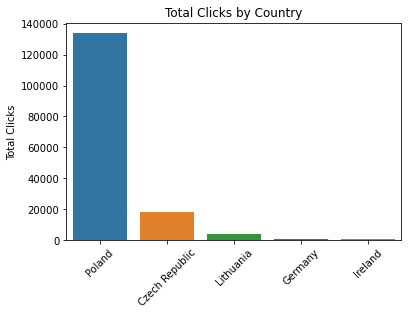

In [19]:
#plot top 10 countries
sns.barplot(x=top_5_countries.index, y=top_5_countries.values)
plt.xticks(rotation=45)
plt.ylabel('Total Clicks')
plt.title('Total Clicks by Country')
plt.show()

* Majority of clicks from Poland users

### Clicks by Color

In [20]:
#sort clicks by color
color_counts = data.colour.value_counts()

In [21]:
#read colors txt file
colors = pd.read_csv('colors.txt', sep='-', names=['number','color'])
#create colors dictionary
colors_dict = pd.Series(colors.color.values,index=colors.number).to_dict()
#add new country_name column
data['color_name'] = data.colour.map(colors_dict)

In [22]:
#sort clicks by color
colors_value_counts = data.color_name.value_counts()
print(colors_value_counts)

black             29764
blue              29259
gray              17476
brown             16517
white             15939
of many colors    13531
red                8830
beige              7785
green              6876
violet             6295
pink               5292
olive              3579
navy blue          2664
burgundy           1667
Name: color_name, dtype: int64


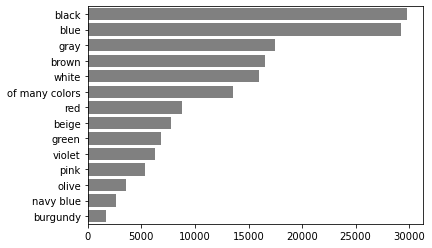

In [23]:
#plot clicks by color
sns.barplot(y=colors_value_counts.index, x=colors_value_counts.values, orient='h', color='gray')
plt.show()

* Black and blue are top colors for products clicked
* Overall, neutral colors are strongest performers